# ***RED WINE QUALITY PREDICTION***
>  *By Miora,
  Thembela, Omer and
  Isaac*

**IIP 2024 Group 12**

The goal of this project is to predict the quality of red wwine variants of Portuguese "Vinho Verde" using physicochemical and sensory variables. This project aims to develop our skills in classification or regression tasks, data preprocessing and predictive modeling.

##  INTRODUCTION
In this project, we will analyze a dataset containing attributes related to the physicochemical properties and sensory evaluations of red wine. Our primary objectives are to build a predictive model to estimate wine quality based on these physicochemical tests, identify and analyze the variables that most significantly influence wine quality, and provide suggestions and recommendations to firms based on our analysis and findings.

##  DATASET OVERVIEW
The Red Wine Quality Prediction dataset includes the following features:

*   Fixed Acidity: Tartaric acid, typically the primary component of acidity in wine.
*   Volatile Acidity: Acetic acid in wine, which at too high levels can lead to an unpleasant, vinegar taste.
*   Citric Acid: Adds 'freshness' and flavor to the wine.

*   Residual Sugar: The amount of sugar remaining after the fermentation process.
*   Chlorides: The amount of salt in the wine.
*   Free Sulfur Dioxide: SO2 in its free form is able to prevent microbial growth and the oxidation of wine.
*   Total Sulfur Dioxide: The sum of free and bound forms of SO2; a measure of overall sulfur dioxide content.
*   pH: How acidic or basic the wine is.

*   Sulphates: A wine additive which can contribute to sulfur dioxide gas (SO2) levels, acts as an antimicrobial and antioxidant.
*   Alcohol: The alcohol content in wine.
*   Density: Measure of how "heavy" the wine is for its size, which is affected by alcohol and sugar content.


Our target variable is called Quality: A score assigned by wine tasters to the wine (ranging from 3 to 8).


#  **Exploratory Data Analysis (EDA) section**

## *Import packages*

In [ ]:
# For data manipulation
import numpy as np  # linear algebra
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For hypothesis testing
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import norm

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler


import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

## *Accessing data*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load data
df = pd.read_csv("winequality-red.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## *Gather basic information about the data*

In [ ]:
# Display all column names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Display the first 5 rows of the data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## *Change the original classes to 0 to 5*

In [ ]:
# Mapping from 3-8 to 0-5
mapping = {3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}
# Apply the mapping to the 'target' column
df['quality'] = df['quality'].map(mapping)

In [ ]:
# Display the first 5 rows of the data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [ ]:
# Gather basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The dataset is complete, with no missing values, and all features are correctly typed.

In [ ]:
# Gather descriptive statistics about the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,2.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,3.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000


In [ ]:
# Display the size of the dataframe
df.shape

(1599, 12)

Examine the dataset to determine if any missing values are present.

In [ ]:
# Check for missing values
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
#counts the number of each class
df['quality'].value_counts()

,count
quality,
2,681
3,638
4,199
1,53
5,18
0,10


In [ ]:
#percentage of each class
quality_percentage = df['quality'].value_counts(normalize=True) * 100
quality_percentage.round(2)

,proportion
quality,
2,42.59
3,39.90
4,12.45
1,3.31
5,1.13
0,0.63


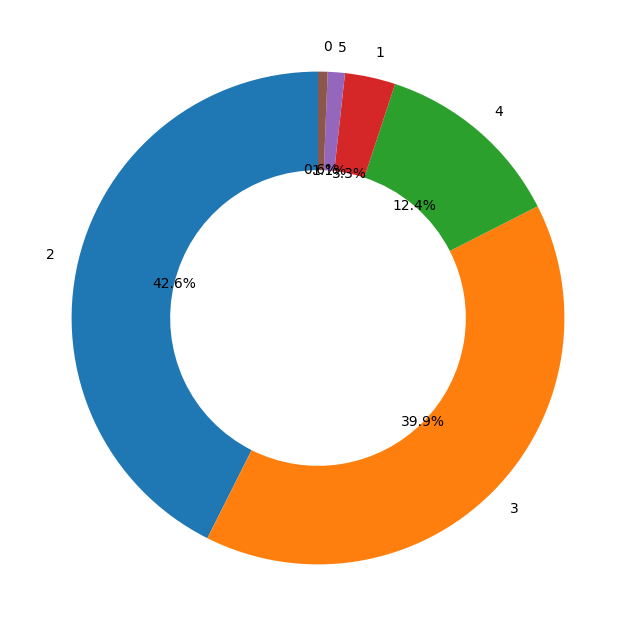

In [ ]:
# Assuming 'quality_percentage' is already calculated
# quality_percentage = df['quality'].value_counts(normalize=True) * 100
# quality_percentage = quality_percentage.round(2)

# Labels and sizes for the donut chart
labels = quality_percentage.index
sizes = quality_percentage.values

# Create a pie chart with a hole in the center (donut chart)
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})

# Draw the donut chart
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()


The donut chart highlights the skewed distribution of classes, showing a majority of instances belonging to classes 2, 4, and 3, while classes 0, 5, and 1 are represented by a smaller number of samples.

Names are assign to each wine quality level according to the scale in our dataset, which ranges from 3 to 8:

* Quality 0: Poor
* Quality 1: Below Average
* Quality 2: Average
* Quality 3: Good
* Quality 4: Very Good
* Quality 5: Excellent

The result is the 'Poor' and 'Excellent' categories combined make up just 1.76% of the dataset. In contrast, 'Below Average' constitutes 3.31%, while 'Average' and 'Good' dominate, representing 42.59% and 39.9%, respectively. Lastly, the 'Very Good' category comprises 12.45% of the dataset.

Given the imbalanced nature of our dataset, careful consideration must be given to the selection of machine learning algorithm. Certain algorithms may be more susceptible to bias or underperformance in such scenarios.



##*Checking Duplicate Data*

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Percentage of duplicated data
percentage = df.duplicated().sum() / df.shape[0] * 100

print(f'{duplicates} rows contain duplicates amounting to {percentage.round(2)}% of the total data.')

240 rows contain duplicates amounting to 15.01% of the total data.


In [ ]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,2
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,2
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,2
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,2
76,8.8,0.410,0.64,2.20,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,2
91,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,3
93,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,2
102,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,3
105,8.1,0.575,0.22,2.10,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,2


## Resolving Duplicates

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2


In [ ]:
df.shape

(1359, 12)

Proceed with the analysis using the dataset without duplicates.

## *Checking outliers*

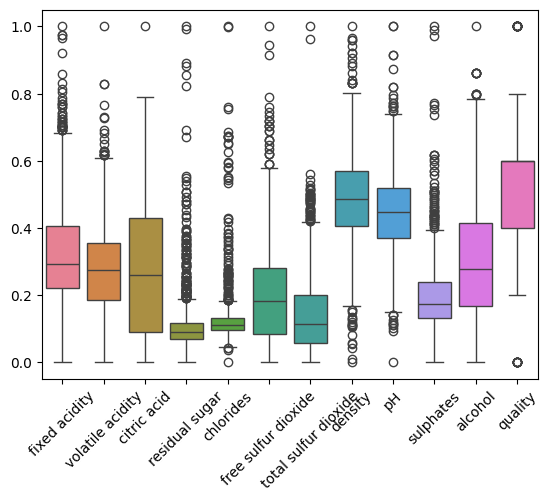

In [ ]:
# Create a boxplot to visualize distribution of all numeric variables and detect any outliers

# plot 1 boxplot for all variables so must first normalize the scale

# select numeric columns
num_columns = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]

#normalize values using min-max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Create df with normalized data
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)

sns.boxplot(data= df_normalized)
plt.xticks(rotation=45)

plt.show()

## *Resolving outliers*

Our analysis indicates the presence of outliers in all variables. Given the potential for calibration errors in pH measurements, Outliers specifically from the pH variable to ensure data accuracy and reliability were removed. Reference to https://mx.ohaus.com/en-ap/about-us/news/ph-measurements-are-often-wrong!-sort-it-out-with


To proceed the IQR method is going to be used.

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['pH'].quantile(0.25)
Q3 = df['pH'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the acceptable range (fence)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['pH'] >= lower_bound) & (df['pH'] <= upper_bound)]

In [ ]:
#checking the df_filtered
df_filtered.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2


In [ ]:
df_filtered.shape

(1331, 12)

In [ ]:
df.shape

(1359, 12)

In [ ]:
otlr = 1359-1331
otlr

28

28 outliers are identified as outliers then removed.

A review boxplot of the new dataset follows.

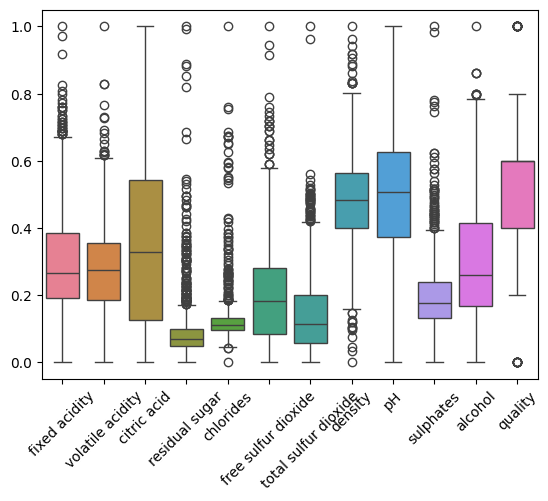

In [ ]:
# Create a boxplot to visualize distribution of all numeric variables and detect any outliers

# plot 1 boxplot for all variables so must first normalize the scale

# select numeric columns
num_columns = df_filtered[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]

#normalize values using min-max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Create df with normalized data
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)

sns.boxplot(data= df_normalized)
plt.xticks(rotation=45)

plt.show()

In [ ]:
#using the new dataset without outliers
df = df_filtered

## *Understanding the relationships among the variables*

In [ ]:
correlation_matrix = df.corr()

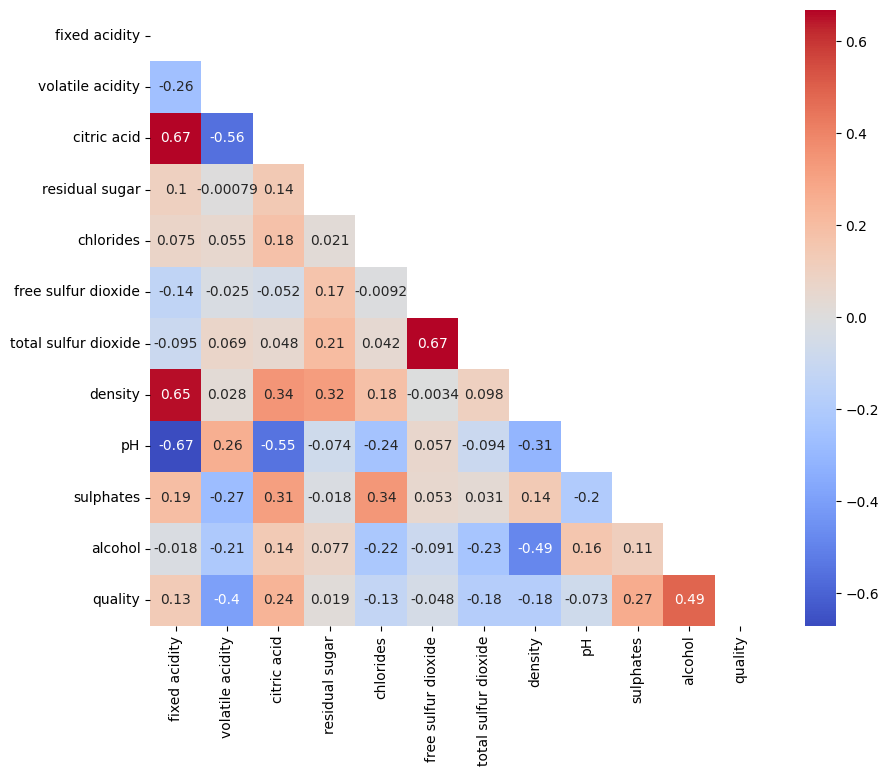

In [ ]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap with the mask applied
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True)

# Show the plot
plt.show()

The correlation coefficients within this dataset range from a strong positive correlation of 0.67 to a strong negative correlation of -0.69.

This implies there are strong relationships between variables in the dataset, but these relationships are both positively and negatively correlated.

The correlation matrix highlights several strong relationships between wine attributes. Citric acid is closely linked to both fixed acidity and density. Similarly, total sulfur dioxide is highly correlated with free sulfur dioxide. Interestingly, pH is inversely related to both volatile acidity and citric acid. Lastly, alcohol content and density are moderately negatively correlated.

These correlations suggest certain properties of wine tend to occur together. For example, wines with high citric acid levels often have high fixed acidity and density. Conversely, wines with a higher pH tend to have lower levels of volatile acidity and citric acid. Understanding these relationships can provide insights into winemaking processes and potential quality indicators.

Given the class imbalance in our dataset, we will apply the SMOTE technique to oversample the minority class and create a more balanced dataset for training.

# Conclusion from the EDA

The dataset is both imbalanced and multi-class, with six distinct categories. Additionally, it contains outliers, which can further complicate the modeling process. Careful algorithm selection and data preprocessing techniques are essential to address these challenges and ensure accurate classification.

# Model implementation

## *Splitting the dataset and applying SMOTE*

The initial step in the supervised classification task is to partition the dataset into training and testing subsets. For this analysis, therefore 20% of the data for testing purposes was allocated.

Given the class imbalance in the dataset, the SMOTE technique is applied to oversample the minority class and create a more balanced dataset for training.

In [ ]:
# features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('quality', axis=1))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Create the SMOTE object
smote = SMOTE(
    sampling_strategy='auto',  # Strategy to sample the minority class. 'auto' means resample all minority classes.
    random_state=42,           # Seed for random number generation.
    k_neighbors=5,             # Number of nearest neighbors to use for generating synthetic samples.
    n_jobs=None                # Number of CPU cores to use (-1 means use all available cores).
)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,  stratify=y_resampled)

## *Implementation the Logistic Regression*

Logistic regression will serve as our baseline model for comparison, providing a benchmark against which we can evaluate the performance of other more complex models.

Accuracy: 0.5862573099415205
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       114
           1       0.57      0.62      0.60       114
           2       0.54      0.46      0.50       114
           3       0.40      0.31      0.35       114
           4       0.48      0.46      0.47       114
           5       0.63      0.76      0.69       114

    accuracy                           0.59       684
   macro avg       0.57      0.59      0.58       684
weighted avg       0.57      0.59      0.58       684



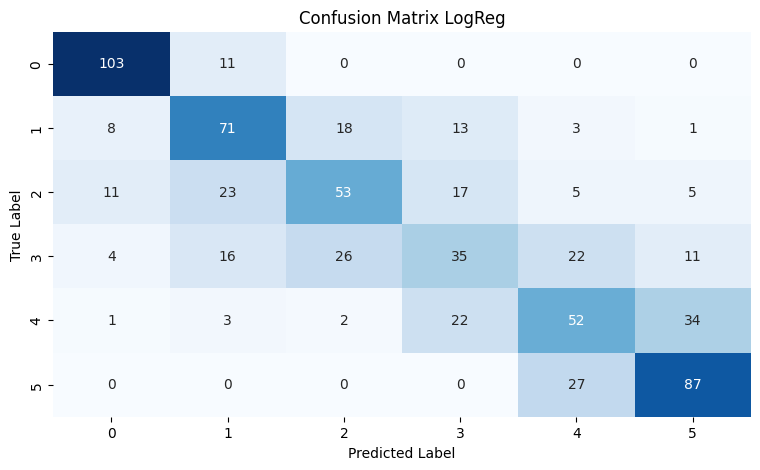

In [ ]:
# Initialize and train the model with Ridge regularization (L2 regularization)
# logistic_model_ridge = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', max_iter=10000, C=1.0 )
logistic_model_ridge = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', max_iter=10000, C=1.1, class_weight='balanced')
logistic_model_ridge.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model_ridge.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(9, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix LogReg')
plt.show()

Overall, the model's performance is uneven across classes.

The classes 0 and 5 are demonstrating strong performance with high precision, recall, and F1-scores, indicating good accuracy in identifying and classifying instances in these classes.
However the classes 1, 2, 3, and 4: are showing moderate performance with balanced precision and recall, suggesting room for improvement in accurately classifying these classes.

Given the performance of the current model, alternative algorithms were explored, these may be more suitable for this task.

Considering the dataset's challenges—imbalance, multi-class classification, and outliers—ensemble methods are a promising approach. Their robustness and ability to handle complex datasets make them well-suited for this task.

## *Implementation of Decision Tree*

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       114
           1       0.80      0.86      0.83       114
           2       0.63      0.56      0.59       114
           3       0.55      0.45      0.50       114
           4       0.72      0.79      0.75       114
           5       0.90      0.96      0.93       114

    accuracy                           0.77       684
   macro avg       0.76      0.77      0.76       684
weighted avg       0.76      0.77      0.76       684



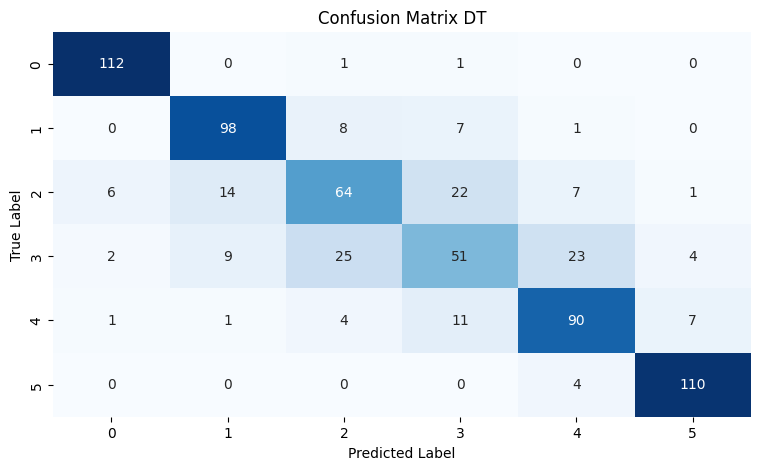

In [ ]:
# Create decision tree classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model

print(classification_report(y_test, y_pred))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(9, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix DT')
plt.show()

The model performs very well for Classes 0, 1, 4, and 5, with high precision, recall, and F1-scores.
However, the performance for Classes 2 and 3 is notably weaker. This could be due to several factors, such as class overlap, class imbalance, or insufficient features that distinguish these classes. Further analysis may be required to improve performance for these classes.

## *Implementation of Random Forest*





Accuracy: 0.8347953216374269
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       114
           1       0.85      0.96      0.91       114
           2       0.73      0.61      0.66       114
           3       0.64      0.53      0.58       114
           4       0.82      0.91      0.86       114
           5       0.93      1.00      0.97       114

    accuracy                           0.83       684
   macro avg       0.82      0.83      0.83       684
weighted avg       0.82      0.83      0.83       684



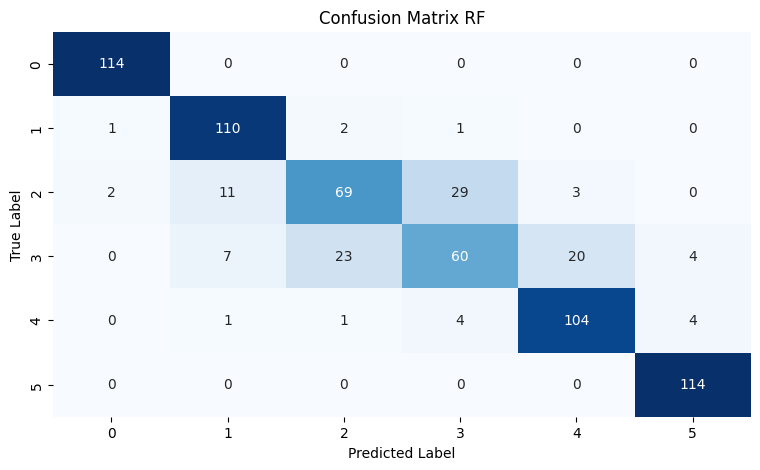

In [ ]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    random_state=42,
    class_weight='balanced'  # Handle class imbalance within the Random Forest
)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(9, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix RF')
plt.show()

Overall, the model exhibits strong performance across most classes.

The classes 0, 1, 4, 7, and 8 demonstrate exceptional results with precision, recall, and F1-scores very close to 1.00, indicating outstanding accuracy in identifying and classifying instances in these categories.

And class 2 and 3 show solid performance, with F1-scores around 0.60 and 0.70 respectively, indicating reasonable balance between precision and recall.

## *Implementation of Gradient Boosting Classifier*

In [ ]:
gbm = GradientBoostingClassifier()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

In [ ]:
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='f1_weighted')


In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_weighted')

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       114
           1       0.94      0.93      0.93       114
           2       0.73      0.66      0.69       114
           3       0.63      0.61      0.62       114
           4       0.85      0.91      0.88       114
           5       0.95      0.99      0.97       114

    accuracy                           0.85       684
   macro avg       0.84      0.85      0.85       684
weighted avg       0.84      0.85      0.85       684



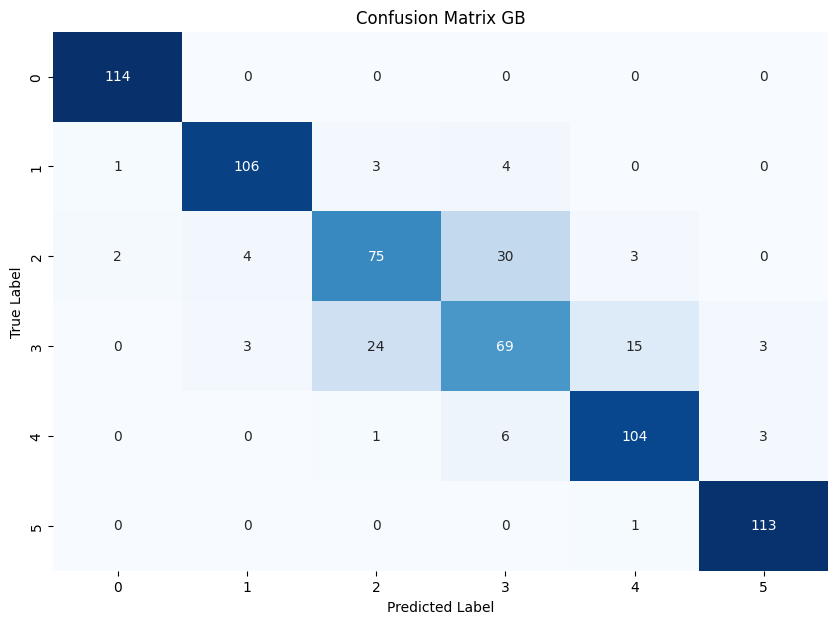

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix GB')
plt.show()

Overall, the model exhibits strong performance across most classes.

Classes 0, 1, 4 and demonstrate exceptional results with precision, recall, and F1-scores very close to 1.00, indicating outstanding accuracy in identifying and classifying instances in these categories.
Classes 2 and 3 show solid performance, with F1-scores around 0.60 and 0.70 respectively, indicating reasonable balance between precision and recall.

## *Implementation of XGBoostClassifer*

Accuracy: 0.8480
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       114
           1       0.92      0.95      0.93       114
           2       0.74      0.67      0.70       114
           3       0.63      0.58      0.60       114
           4       0.82      0.90      0.86       114
           5       0.96      0.99      0.97       114

    accuracy                           0.85       684
   macro avg       0.84      0.85      0.84       684
weighted avg       0.84      0.85      0.84       684



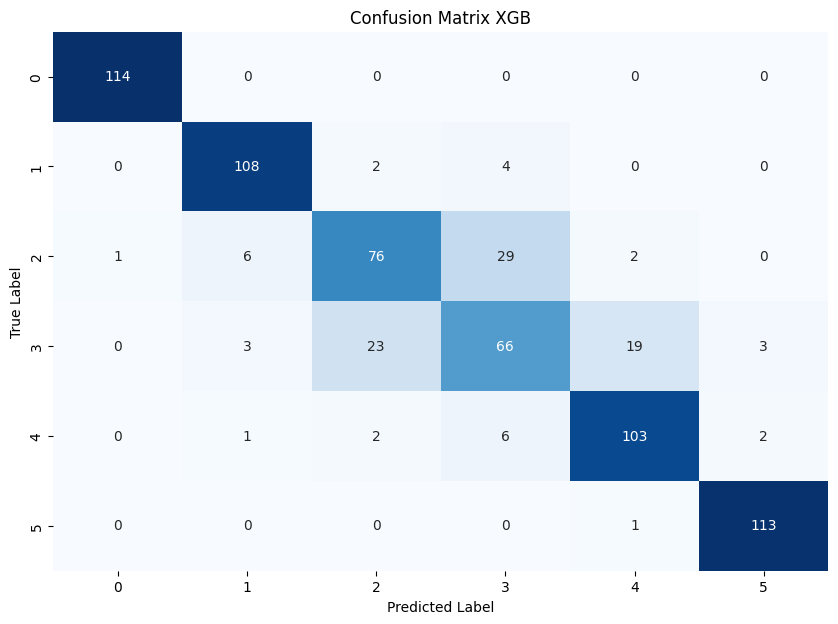

In [ ]:
model = XGBClassifier(num_class=6, use_label_encoder=False, eval_metric='mlogloss')
xgb_cv = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix XGB')
plt.show()

In [ ]:
# Create lists for each model's performance metrics
lr_precision = [0.81, 0.57, 0.54, 0.40, 0.48, 0.63]
lr_recall = [0.90, 0.62, 0.46, 0.31, 0.46, 0.76]
lr_f1_score = [0.85, 0.60, 0.50, 0.35, 0.47, 0.69]

dt_precision = [0.93, 0.82, 0.64, 0.51, 0.70, 0.89]
dt_recall = [0.98, 0.84, 0.56, 0.46, 0.75, 0.96]
dt_f1_score = [0.96, 0.83, 0.60, 0.48, 0.73, 0.92]

rf_precision = [0.97, 0.85, 0.73, 0.64, 0.82, 0.93]
rf_recall = [1.00, 0.96, 0.61, 0.53, 0.91, 1.00]
rf_f1_score = [0.99, 0.91, 0.66, 0.58, 0.86, 0.97]

gb_precision = [0.97, 0.92, 0.70, 0.62, 0.85, 0.95]
gb_recall = [1.00, 0.93, 0.68, 0.56, 0.89, 0.99]
gb_f1_score = [0.99, 0.93, 0.69, 0.59, 0.87, 0.97]

xgb_precision = [0.99, 0.92, 0.74, 0.63, 0.82, 0.96]
xgb_recall = [1.00, 0.95, 0.67, 0.58, 0.90, 0.99]
xgb_f1_score = [1.00, 0.93, 0.70, 0.60, 0.86, 0.97]

# Create a DataFrame with the metrics
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'XGBoost'],
    'Precision': [lr_precision, dt_precision, rf_precision, gb_precision, xgb_precision],
    'Recall': [lr_recall, dt_recall, rf_recall, gb_recall, xgb_recall],
    'F1-Score': [lr_f1_score, dt_f1_score, rf_f1_score, gb_f1_score, xgb_f1_score]
}
df_results = pd.DataFrame(data)

# Display the DataFrame
df_results

,Model,Precision,Recall,F1-Score
0,Logistic Regression,"[0.81, 0.57, 0.54, 0.4, 0.48, 0.63]","[0.9, 0.62, 0.46, 0.31, 0.46, 0.76]","[0.85, 0.6, 0.5, 0.35, 0.47, 0.69]"
1,Decision Tree,"[0.93, 0.82, 0.64, 0.51, 0.7, 0.89]","[0.98, 0.84, 0.56, 0.46, 0.75, 0.96]","[0.96, 0.83, 0.6, 0.48, 0.73, 0.92]"
2,Random Forest,"[0.97, 0.85, 0.73, 0.64, 0.82, 0.93]","[1.0, 0.96, 0.61, 0.53, 0.91, 1.0]","[0.99, 0.91, 0.66, 0.58, 0.86, 0.97]"
3,Gradient Boost,"[0.97, 0.92, 0.7, 0.62, 0.85, 0.95]","[1.0, 0.93, 0.68, 0.56, 0.89, 0.99]","[0.99, 0.93, 0.69, 0.59, 0.87, 0.97]"
4,XGBoost,"[0.99, 0.92, 0.74, 0.63, 0.82, 0.96]","[1.0, 0.95, 0.67, 0.58, 0.9, 0.99]","[1.0, 0.93, 0.7, 0.6, 0.86, 0.97]"


 XGBoost achieves the highest precision, recall, and F1-score across all classes, demonstrating superior overall performance.
Random Forest and Gradient Boost also excel: These models show strong results, particularly in classes 0, 1, 4, 5, and 8. Decision Tree performs well on some classes but struggles on others, suggesting its sensitivity to data distribution and potential overfitting. Logistic Regression faces challenges in accurately classifying classes 1, 2, 3, and 4, indicating its limitations for this dataset.

# Evaluate Feature Importance

                 Feature  Importance
10               alcohol    0.184638
1       volatile acidity    0.151034
9              sulphates    0.120262
6   total sulfur dioxide    0.088733
4              chlorides    0.080217
0          fixed acidity    0.076551
8                     pH    0.071354
7                density    0.063330
2            citric acid    0.058481
3         residual sugar    0.056287
5    free sulfur dioxide    0.049115


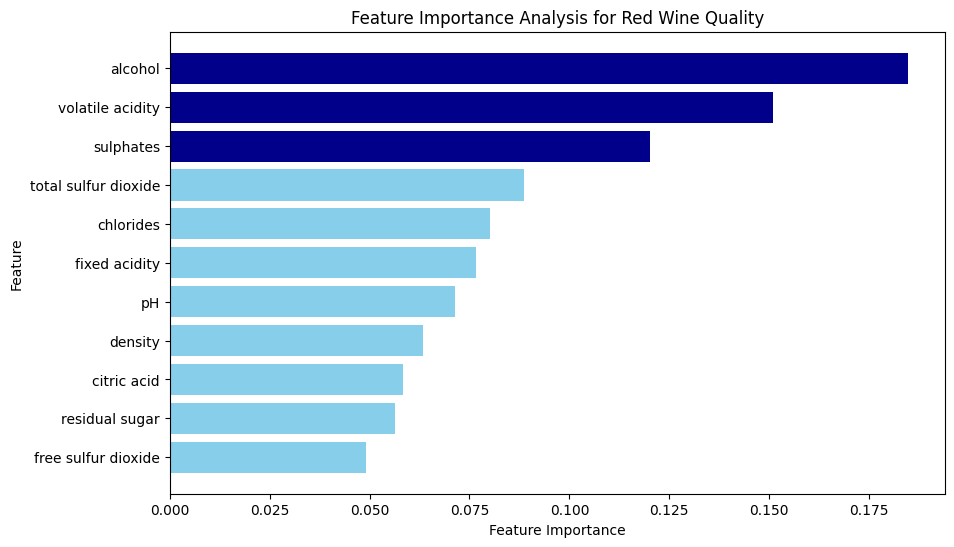

In [ ]:
# Access the feature importances from the cross-validated model
importances = xgb_cv.feature_importances_

# Print or plot feature importances (consider using pandas for easier manipulation)
#print(importances)

# Create a DataFrame to store feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a list of colors for the bars
colors = ['darkblue' if importance > 0.10 else 'skyblue' for importance in feature_importance_df['Importance']]

# Display the DataFrame
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis for Red Wine Quality')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


Findings highlight alcohol content, volatile acidity, and sulfates are key discriminators for differentiating between classes.





# Conclusion

Exploratory data analysis revealed strong correlations among certain wine attributes, however, the XGBoost model, the chosen classifier, emphasizes alcohol, volatile acidity, and sulfates as the key factors driving class distinctions. This suggests these features are the primary determinants in classifying the wine data, despite the observed correlations.